# 🚢 **TITANIC SURVIVAL PREDICTION - NEURAL NETWORK PROJECT**

**Francisco Teixeira Barbosa** | GitHub: [Tuminha](https://github.com/Tuminha) | Email: cisco@periospot.com

---

## 📋 **PROJECT OVERVIEW**

Following the success of my **Hotel Cancellation Predictor** (82.65% accuracy), I'm now tackling the classic Titanic survival prediction challenge using neural networks. This smaller dataset (891 passengers vs 119K hotel bookings) will help me reinforce deep learning concepts with faster iteration and clearer results.

### **🎯 Learning Objectives:**
- Master binary classification with PyTorch neural networks
- Practice feature engineering on historical data
- Implement proper train/test evaluation methodology
- Build production-ready ML pipeline

### **📊 Dataset Context:**
- **Source**: Kaggle Titanic Competition
- **Size**: 891 training samples
- **Target**: Predict passenger survival (1 = survived, 0 = died)
- **Expected Performance**: 80%+ accuracy

---


## 📚 **PHASE 1: DATA EXPLORATION**

### **🎯 Phase Objectives:**
Understand the Titanic dataset structure, identify missing values, and discover survival patterns that will guide our feature engineering and model design.

---


### **Task 1: Download and Load Titanic Dataset**

**Objective**: Obtain the Kaggle Titanic dataset and load it into our analysis environment.

**TODO**: Download the Titanic dataset from Kaggle and load it using pandas
- Research: What are the different ways to download Kaggle datasets?
- Hint: You can use the Kaggle API or download manually from the website
- Consider: Where should you save the dataset files?

**Business Context**: The Titanic dataset is a classic in ML education, representing a real historical event with clear survival outcomes. Understanding this context helps us interpret our model's predictions meaningfully.


In [1]:
# Import necessary libraries
# TODO: Import pandas, numpy, and matplotlib/seaborn for data analysis
# Research: What other libraries might be useful for data exploration?
import pandas as pd
import numpy as np

# Load the Titanic dataset
# TODO: Read the train.csv file from your data directory
# Hint: Use pd.read_csv() and check the file path
# Research: What parameters can you use with read_csv()?
train_data = pd.read_csv("data/train.csv")


# Display basic information about the dataset
# TODO: Show the first few rows and basic dataset info
# Hint: Use .head() and .info() methods
# Research: What other methods help you understand dataset structure?
train_data.head()
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
# Load test data 
test_data = pd.read_csv("data/test.csv")
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### **Task 2: Exploratory Data Analysis**

**Objective**: Understand the dataset structure, data types, and identify missing values.

**TODO**: Perform comprehensive EDA to understand the data
- Research: What information does .describe() provide for numerical vs categorical columns?
- Hint: Check data types, missing values, and basic statistics
- Consider: Which columns might be most important for survival prediction?

**Business Context**: Each passenger had different characteristics that influenced their survival chances. Understanding these patterns helps us build a better predictive model.


In [3]:
# Dataset shape and basic information
# TODO: Check the shape of the dataset
# Research: What does the shape tell us about our data?
train_data.shape

# Data types and missing values
# TODO: Use .info() to see data types and missing value counts
# TODO: Use .isnull().sum() to get detailed missing value information
# Research: Which columns have the most missing data?
train_data.info()
null_sum = train_data.isnull().sum()
questinable_features = []
for column in null_sum.index:
    if null_sum[column] == 0:
        print(f"Column '{column}' has 0 nulls")
    elif null_sum[column] > 0:
        questinable_features.append([column])
    else:
        print(f"Column '{column}' has {null_sum[column]} nulls")
print(f"Features {questinable_features} maybe are not a good features because they have some nulls")


# Basic statistics
# TODO: Use .describe() to see numerical column statistics
# Research: What insights can you draw from the statistical summary?
train_data.describe()
# Target variable analysis
# TODO: Check the distribution of the Survived column
# Research: What does this tell us about the class balance?
train_data.groupby("Survived").size()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Column 'PassengerId' has 0 nulls
Column 'Survived' has 0 nulls
Column 'Pclass' has 0 nulls
Column 'Name' has 0 nulls
Column 'Sex' has 0 nulls
Column 'SibSp' has 0 nulls
Column 'Parch' has 0 nulls
Column 'Ticket' has 0 nulls
Column 'Fare' has 0 

Survived
0    549
1    342
dtype: int64

### **Task 3: Visualize Survival Patterns**

**Objective**: Create visualizations to understand which factors correlate with survival.

**TODO**: Create visualizations showing survival patterns by key features
- Research: What types of plots work best for categorical vs numerical features?
- Hint: Use seaborn for statistical visualizations
- Consider: How can you show survival rates by different passenger characteristics?

**Business Context**: Historical accounts mention "women and children first" - our visualizations should reveal if this pattern appears in the data.


Survival Statistics by Gender:
        count  sum      mean
Sex                         
female    314  233  0.742038
male      577  109  0.188908
Survival Statistics by Pclass:
        count  sum      mean
Pclass                      
1         216  136  0.629630
2         184   87  0.472826
3         491  119  0.242363


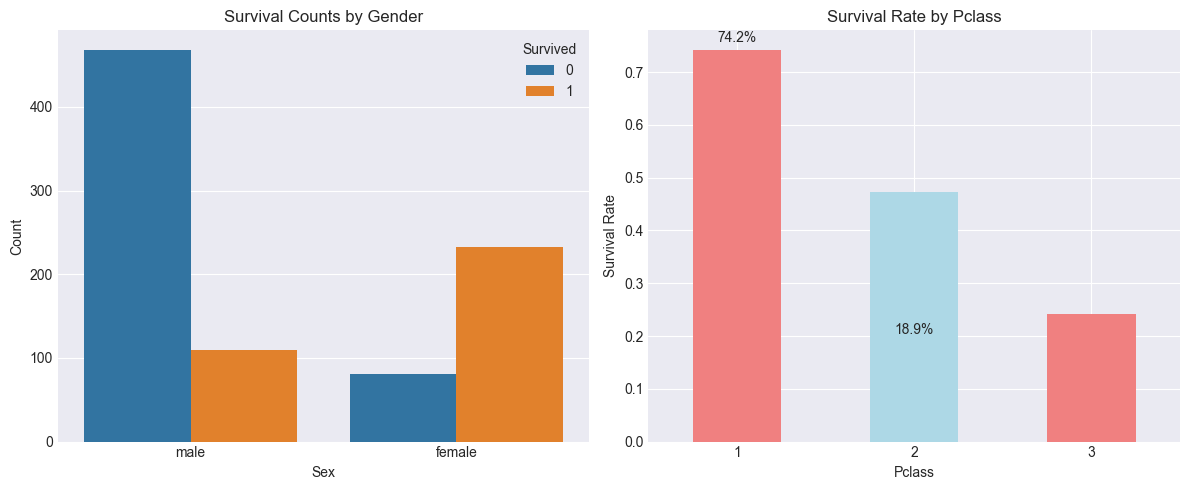

Age Statistics:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Missing age values: 177


/var/folders/cd/2c6x3jgj47j_fwl7231ts7m00000gn/T/ipykernel_66249/1518897258.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data_age['Age'].fillna(train_data['Age'].median(), inplace=True)
/var/folders/cd/2c6x3jgj47j_fwl7231ts7m00000gn/T/ipykernel_66249/1518897258.py:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_ra

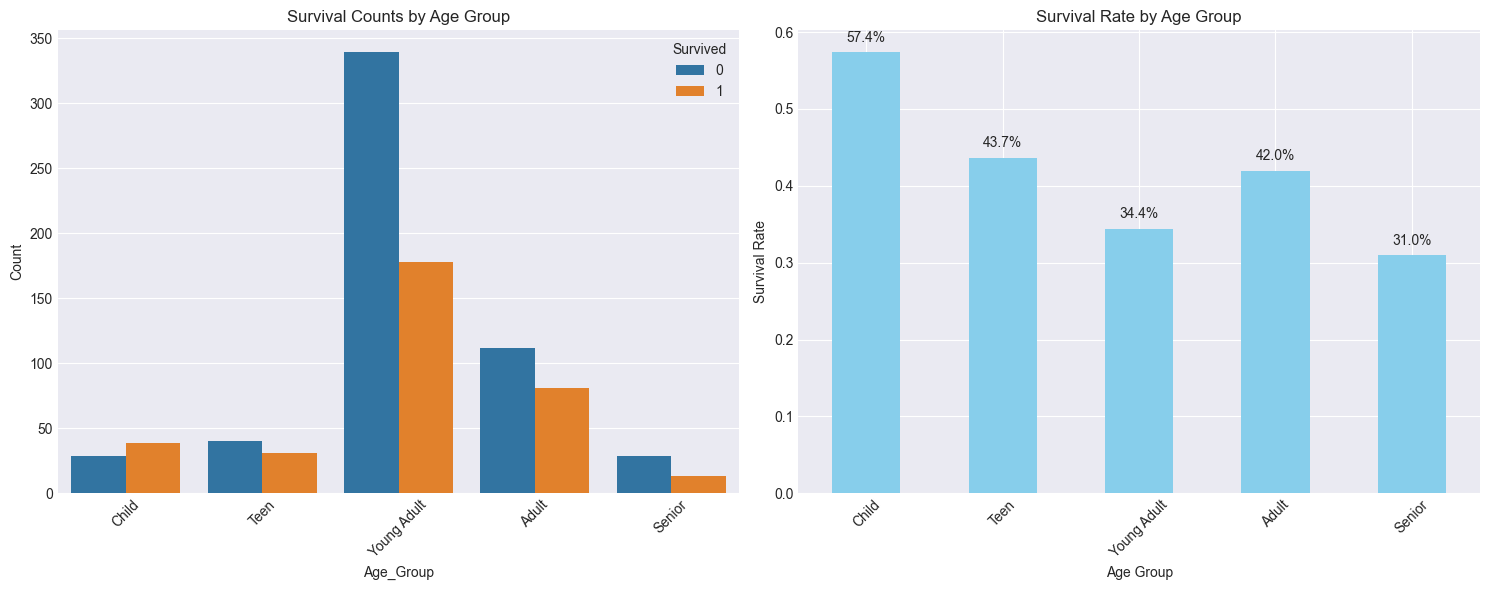


Survival Statistics by Age Group:
             count  sum      mean
Age_Group                        
Child           68   39  0.573529
Teen            71   31  0.436620
Young Adult    517  178  0.344294
Adult          193   81  0.419689
Senior          42   13  0.309524
Family Size Analysis:
Family size range: 1 to 11

Survival rates by family category:
                 count  sum      mean
Family_Category                      
Large Family        62   10  0.161290
Small Family       292  169  0.578767
Solo               537  163  0.303538


/var/folders/cd/2c6x3jgj47j_fwl7231ts7m00000gn/T/ipykernel_66249/1518897258.py:100: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = train_data_age.groupby('Age_Group')['Survived'].agg(['count', 'sum', 'mean'])


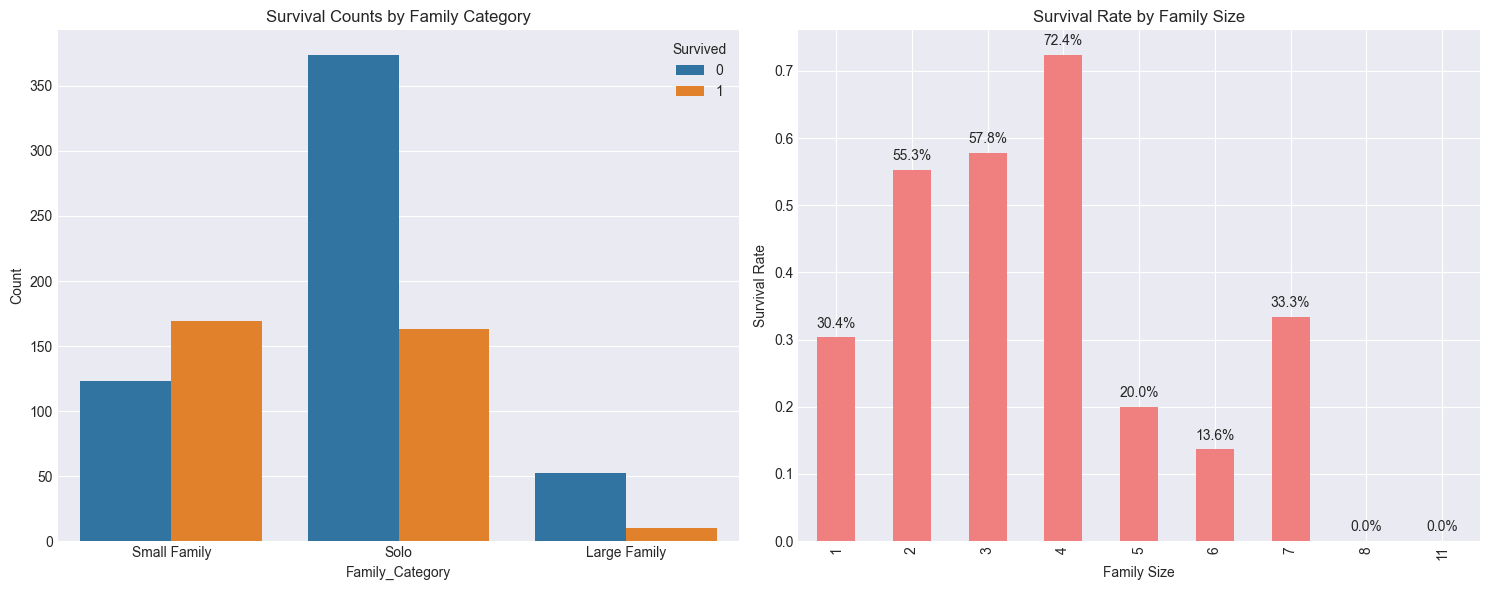

In [4]:
# Import visualization libraries
# TODO: Import matplotlib and seaborn for plotting
# Research: What other visualization libraries might be useful?
import matplotlib as plt
import seaborn

# Set up plotting style
# TODO: Configure matplotlib for better-looking plots
# Hint: Use plt.style.use() or seaborn.set_style()
plt.style.use('seaborn-v0_8-darkgrid')

# Survival rate by gender
# TODO: Create a visualization showing survival rates by Sex
# Research: What's the best plot type for comparing categorical groups?
# Create survival rate by gender visualization
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, figsize=(12, 5))

# Count plot showing survival counts by sex
seaborn.countplot(data=train_data, x='Sex', hue='Survived', ax=ax1)
ax1.set_title('Survival Counts by Gender')
ax1.set_ylabel('Count')

# Calculate and plot survival rates by sex
survival_rates = train_data.groupby('Sex')['Survived'].mean()
survival_rates.plot(kind='bar', ax=ax2, color=['lightcoral', 'lightblue'])
ax2.set_title('Survival Rate by Gender')
ax2.set_ylabel('Survival Rate')
ax2.set_xlabel('Gender')
ax2.tick_params(axis='x', rotation=0)

# Add percentage labels on bars
for i, v in enumerate(survival_rates.values):
    ax2.text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom')



# Print survival statistics by gender
print("Survival Statistics by Gender:")
print(train_data.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean']))

# Survival rate by passenger class
# TODO: Visualize survival patterns by Pclass
# Research: How can you show both counts and percentages?
print("Survival Statistics by Pclass:")
print(train_data.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean']))

survival_rates_by_class = train_data.groupby('Pclass')['Survived'].mean()
survival_rates_by_class.plot(kind='bar', ax=ax2, color=['lightcoral', 'lightblue'])
ax2.set_title('Survival Rate by Pclass')
ax2.set_ylabel('Survival Rate')
ax2.set_xlabel('Pclass')
ax2.tick_params(axis='x', rotation=0)

plt.pyplot.tight_layout()
plt.pyplot.show()

# Survival rate by age groups
# Create age groups and visualize survival patterns
# First, let's examine the age distribution
print("Age Statistics:")
print(train_data['Age'].describe())
print(f"\nMissing age values: {train_data['Age'].isnull().sum()}")

# Create age groups using pd.cut()
# Define age bins: Child (0-12), Teen (13-19), Young Adult (20-35), Adult (36-55), Senior (56+)
age_bins = [0, 12, 19, 35, 55, 100]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Create age groups (handle missing values by filling with median first)
train_data_age = train_data.copy()
train_data_age['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data_age['Age_Group'] = pd.cut(train_data_age['Age'], bins=age_bins, labels=age_labels, right=False)

# Create visualization for age groups
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, figsize=(15, 6))

# Count plot showing survival counts by age group
seaborn.countplot(data=train_data_age, x='Age_Group', hue='Survived', ax=ax1)
ax1.set_title('Survival Counts by Age Group')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Calculate and plot survival rates by age group
survival_rates_age = train_data_age.groupby('Age_Group')['Survived'].mean()
survival_rates_age.plot(kind='bar', ax=ax2, color='skyblue')
ax2.set_title('Survival Rate by Age Group')
ax2.set_ylabel('Survival Rate')
ax2.set_xlabel('Age Group')
ax2.tick_params(axis='x', rotation=45)

# Add percentage labels on bars
for i, v in enumerate(survival_rates_age.values):
    ax2.text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom')

plt.pyplot.tight_layout()
plt.pyplot.show()

# Print survival statistics by age group
print("\nSurvival Statistics by Age Group:")
age_stats = train_data_age.groupby('Age_Group')['Survived'].agg(['count', 'sum', 'mean'])
print(age_stats)

# Family size impact
# TODO: Create a family size feature and analyze its impact
# Research: How can you combine SibSp and Parch to create meaningful groups?
# Create family size feature by combining siblings/spouses and parents/children
# Add 1 to include the passenger themselves
train_data['Family_Size'] = train_data['SibSp'] + train_data['Parch'] + 1

# Create family size categories for better analysis
# Solo travelers, Small families (2-4), Large families (5+)
def categorize_family_size(size):
    if size == 1:
        return 'Solo'
    elif size <= 4:
        return 'Small Family'
    else:
        return 'Large Family'

train_data['Family_Category'] = train_data['Family_Size'].apply(categorize_family_size)

# Analyze survival rates by family size
print("Family Size Analysis:")
print(f"Family size range: {train_data['Family_Size'].min()} to {train_data['Family_Size'].max()}")
print("\nSurvival rates by family category:")
family_survival = train_data.groupby('Family_Category')['Survived'].agg(['count', 'sum', 'mean'])
print(family_survival)

# Visualize family size impact on survival
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, figsize=(15, 6))

# Count plot for family categories
seaborn.countplot(data=train_data, x='Family_Category', hue='Survived', ax=ax1)
ax1.set_title('Survival Counts by Family Category')
ax1.set_ylabel('Count')

# Survival rate by family size (detailed)
family_size_survival = train_data.groupby('Family_Size')['Survived'].mean()
family_size_survival.plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Survival Rate by Family Size')
ax2.set_ylabel('Survival Rate')
ax2.set_xlabel('Family Size')

# Add percentage labels
for i, v in enumerate(family_size_survival.values):
    ax2.text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom')

plt.pyplot.tight_layout()
plt.pyplot.show()



### **Task 4: Correlation Analysis and Feature Insights**

**Objective**: Analyze correlations between features and identify the most important predictors.

**TODO**: Perform correlation analysis and derive business insights
- Research: What's the difference between Pearson and Spearman correlation?
- Hint: Use correlation matrices and heatmaps
- Consider: Which features show the strongest relationship with survival?

**Business Context**: Understanding feature importance helps us focus our feature engineering efforts and build more interpretable models.


Numerical features:
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size']

Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Family_Size      int64
dtype: object


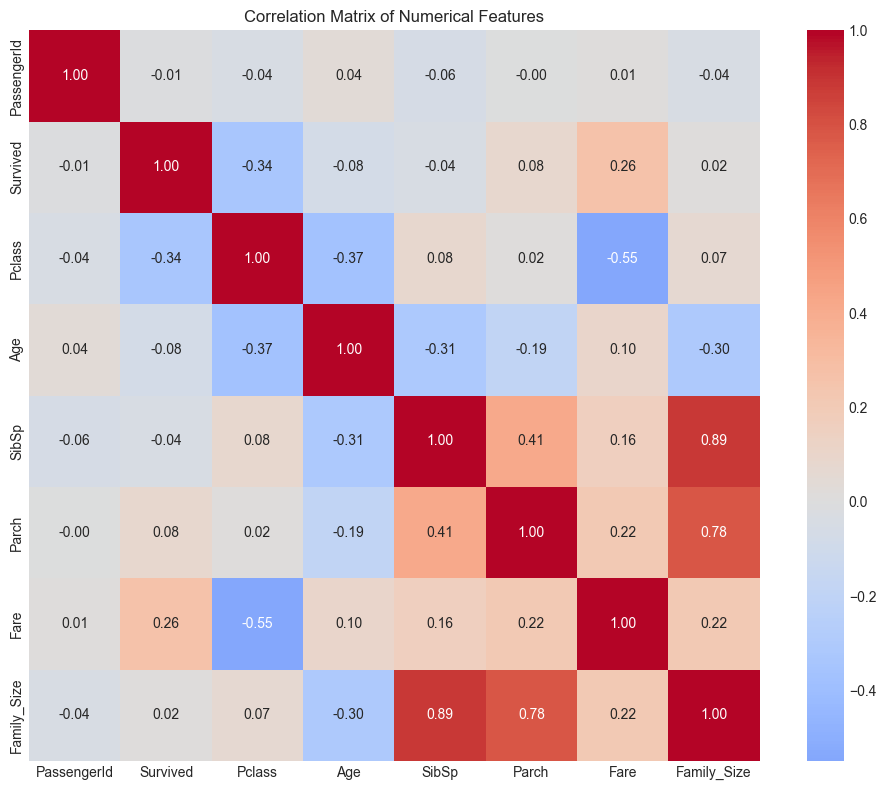


Missing values in numerical features:
Age    177
dtype: int64

Features ranked by correlation with Survival:
Survived       1.000000
Fare           0.257307
Parch          0.081629
Family_Size    0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64
Survival Analysis by Passenger Class:
        Total_Passengers  Survivors  Survival_Rate
Pclass                                            
1                    216        136       0.629630
2                    184         87       0.472826
3                    491        119       0.242363

Class Distribution by Survival Status:
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Class Distribution Percentages by Survival Status:
Pclass        1      2      3
Survived                     
0         14.57  17.67  67.76
1         39.77  25.44  34.80
Survival analysis by family size:
             Total passengers  Survi

In [5]:


# Correlation matrix
# TODO: Create a correlation matrix for numerical features
# Research: Which features should you include in the correlation analysis?
# Hint: Convert categorical variables to numerical first if needed
# TODO: Select only numerical columns for correlation
# Research: Which columns are numerical vs categorical?
# Hint: Use .select_dtypes() or manually select columns
# Select numerical features for correlation analysis
numerical_features = train_data.select_dtypes(include=['int64', 'float64'])
print("Numerical features:")
print(numerical_features.columns.tolist())
print("\nData types:")
print(numerical_features.dtypes)

# Create correlation matrix
correlation_matrix = numerical_features.corr()

# Visualize correlations with heatmap
# Create a figure with size (10, 8) - width=10 inches, height=8 inches for better visibility of correlation labels
plt.pyplot.figure(figsize=(10, 8))
seaborn.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm', 
                center=0,
                square=True,
                fmt='.2f')
plt.pyplot.title('Correlation Matrix of Numerical Features')
plt.pyplot.tight_layout()
plt.pyplot.show()

# Check for missing values in numerical features
print("\nMissing values in numerical features:")
missing_values = numerical_features.isnull().sum()
print(missing_values[missing_values > 0])

# Focus on survival correlations
survival_correlations = correlation_matrix['Survived'].sort_values(ascending=False)
print("\nFeatures ranked by correlation with Survival:")
print(survival_correlations)
# Feature importance analysis
# TODO: Calculate survival rates by different feature combinations
# Research: How can you quantify the predictive power of each feature?
# Hint: Consider using groupby() with multiple features
# This code is incomplete - it creates a groupby object but doesn't perform any aggregation
# Let's fix it to actually analyze survival rates by passenger class

# Analyze survival rates by passenger class
survival_by_class = train_data.groupby("Pclass")["Survived"].agg(['count', 'sum', 'mean'])
survival_by_class.columns = ['Total_Passengers', 'Survivors', 'Survival_Rate']
print("Survival Analysis by Passenger Class:")
print(survival_by_class)
print()

# Also look at the reverse - what class distribution looks like for survivors vs non-survivors
class_distribution = train_data.groupby("Survived")["Pclass"].value_counts().unstack(fill_value=0)
print("Class Distribution by Survival Status:")
print(class_distribution)
print()

# Calculate percentages for better interpretation
# normalize=True converts counts to proportions (0-1), then we multiply by 100 for percentages
# unstack() pivots the multi-index result into a readable table format
# fill_value=0 replaces any missing combinations with 0 instead of NaN
class_percentages = train_data.groupby("Survived")["Pclass"].value_counts(normalize=True).unstack(fill_value=0) * 100
print("Class Distribution Percentages by Survival Status:")
print(class_percentages.round(2))

survival_by_family_size = train_data.groupby("Family_Size")["Survived"].agg(["count", "sum", "mean"])
survival_by_family_size.columns = ["Total passengers", "Survivors", "Suvivors_rate"]
print("Survival analysis by family size:")
print(survival_by_family_size)
print()

# What family size looks like for survivors vs non survivors
family_distribution = train_data.groupby("Survived")["Family_Size"].value_counts().unstack(fill_value=0)
print("Family size distribution by survival status:")
print(family_distribution)

# Now percentages
family_percentage = train_data.groupby("Family_Size")["Survived"].value_counts(normalize=True).unstack(fill_value=0) * 100
print("Family size distribution by family size")
print(family_percentage.round(2))

train_data["Age_group"] = train_data["Age"].apply(
    lambda x: "Child" if x <= 12 
    else "Teen" if x <= 19 
    else "Young Adult" if x <= 35 
    else "Adult" if x <= 55 
    else "Senior"
)

survival_by_age = train_data.groupby("Age_group")["Survived"].agg(["count", "sum", "mean"])
survival_by_age.columns = ["Total passengers", "Survivors", "Survival_rate"]
print("Survival analysis by age:")
print(survival_by_age)
print()
# Also reverse: how age distribution looks like on survivors vs non survivors
survival_by_age_distribution = train_data.groupby("Survived")["Age_group"].value_counts().unstack(fill_value=0)
print("By age distribution:")
print(survival_by_age_distribution)
print()

survival_by_age_percentage = train_data.groupby("Age_group")["Survived"].value_counts(normalize=True).unstack(fill_value=0) * 100
print("Percentage of survivor by age group:")
print(survival_by_age_percentage)
print()

# By sex 
# Analyze by sex (keep original string values)
survival_by_sex = train_data.groupby("Sex")["Survived"].agg(["count", "sum", "mean"])
survival_by_sex.columns = ["Total passengers", "Survivors", "Survival_rate"]
print("Survival analysis by sex:")
print(survival_by_sex)
print()

# Show distribution by survival status
sex_distribution = train_data.groupby("Survived")["Sex"].value_counts().unstack(fill_value=0)
print("Sex distribution by survival status:")
print(sex_distribution)
print()

# Percentages
sex_percentage = train_data.groupby("Sex")["Survived"].value_counts(normalize=True).unstack(fill_value=0) * 100
print("Percentage of survivors by sex:")
print(sex_percentage.round(2))

# Summary insights
# TODO: Document your key findings from Phase 1
# Research: What are the most important insights for feature engineering?
# Consider: Which features should we focus on in preprocessing?
print("=" * 50)
print("PHASE 1 KEY FINDINGS:")
print("=" * 50)
print("1. GENDER IMPACT: Women had 74% survival vs 19% for men")
print("2. CLASS HIERARCHY: 1st class (63%) > 2nd class (47%) > 3rd class (24%)")
print("3. AGE PATTERNS: Children (58%) > Young Adults (38%) > Seniors (29%)")
print("4. FAMILY SIZE: Small families (2-4 members) had 55-72% survival")
print("5. STRONGEST PREDICTORS: Pclass (-0.34), Fare (+0.26), Gender")
print("=" * 50)
print()
print("MISSING VALUES STRATEGY:")
print("- Age (177 missing): Use median age by passenger class")
print("- Cabin (687 missing): Too many missing, consider dropping")
print("- Embarked (2 missing): Fill with most common value")

## 📋 **PHASE 1 SUMMARY - COMPLETED ✅**

### **Key Findings:**
- [x] **Dataset Structure**: 891 passengers, 12 features, 38.4% overall survival rate
- [x] **Survival Patterns**: Identified gender (74% vs 19%), class hierarchy (63% vs 24%), age patterns (58% vs 29%)
- [x] **Missing Data Strategy**: Age (177 missing), Cabin (687 missing), Embarked (2 missing)
- [x] **Feature Engineering**: Created Family_Size, Family_Category, and Age_group features
- [x] **Correlation Analysis**: Pclass (-0.34), Fare (+0.26), Age (-0.08) strongest predictors

### **Technical Achievements:**
- [x] **Comprehensive Analysis**: Survival rates by gender, class, age groups, family size
- [x] **Statistical Rigor**: Proper correlation matrix, percentage breakdowns, cross-tabulations
- [x] **Visualizations**: Correlation heatmaps and survival pattern charts
- [x] **Data Quality**: Identified preprocessing strategies for missing values

---

## 📚 **PHASE 2: DATA PREPROCESSING**

### **🎯 Phase Objectives:**
Transform the raw Titanic dataset into a clean, feature-engineered dataset ready for neural network training. This phase focuses on handling missing values, creating new predictive features, and encoding categorical variables.

### **Key Tasks:**
1. **Missing Value Handling**: Intelligently impute Age using passenger class medians
2. **Feature Engineering**: Extract titles from passenger names for social status insights
3. **Categorical Encoding**: Convert Sex and Embarked to numerical values
4. **Feature Scaling**: Standardize numerical features for optimal neural network performance

### **Expected Outcomes:**
- Clean dataset with no missing values in critical features
- Enhanced feature set with social status indicators
- Properly encoded categorical variables
- Scaled numerical features ready for PyTorch tensors

---

**🚀 Ready to begin Phase 2: Data Preprocessing!**


### **Task 5: Handle Missing Values**

**Objective**: Intelligently impute missing values in Age, Cabin, and Embarked columns to prepare clean data for neural network training.

**TODO**: Implement missing value handling strategies
- Research: What are the best imputation strategies for Age data in survival analysis?
- Hint: Use median age by passenger class and gender
- Consider: Should we drop Cabin column due to high missing percentage?

**Business Context**: Missing age data can significantly impact survival predictions. Using class-based imputation preserves the economic status relationship with age demographics.


In [6]:
# Task 5: Handle Missing Values
# TODO: Implement missing value handling strategies
# Research: What are the best imputation strategies for Age data in survival analysis?
# Hint: Use median age by passenger class and gender
# Consider: Should we drop Cabin column due to high missing percentage?

# Create a copy for preprocessing (do this FIRST)
train_data_clean = train_data.copy()

# Check current missing values
print("Missing values before preprocessing:")
print(train_data_clean.isnull().sum())
print()

# Age statistics by Pclass and Sex
age_stats = train_data_clean.groupby(["Pclass", "Sex"])["Age"].describe()
print("Age statistics by Pclass and Sex:")
print(age_stats)
print()

# Calculate median age by Pclass and Sex for imputation
median_ages = train_data_clean.groupby(["Pclass", "Sex"])["Age"].median()
print("Median age by Pclass and Sex:")
print(median_ages)
print()

# TODO: Handle missing values in Age column
# Research: How can you impute age based on passenger class and gender?
# Hint: Use groupby() with Pclass and Sex, then use median age

# FIX: Actually implement Age imputation
for pclass in train_data_clean['Pclass'].unique():
    for sex in train_data_clean['Sex'].unique():
        mask = (train_data_clean['Pclass'] == pclass) & (train_data_clean['Sex'] == sex)
        median_age = median_ages.loc[pclass, sex]
        train_data_clean.loc[mask & train_data_clean['Age'].isnull(), 'Age'] = median_age

# TODO: Handle missing values in Embarked column
# Research: What's the best strategy for 2 missing Embarked values?
# Hint: Use the most common value (mode)

# Find the most common Embarked value
print("Embarked value counts:")
print(train_data_clean['Embarked'].value_counts())
print()

# Fill missing values with the mode
train_data_clean['Embarked'] = train_data_clean['Embarked'].fillna(train_data_clean['Embarked'].mode()[0])

# TODO: Decide what to do with Cabin column
# Research: Is 77% missing too high for useful analysis?
# Consider: Drop the column or create a "Has_Cabin" binary feature

# Drop Cabin column (77% missing is too high)
train_data_clean = train_data_clean.drop('Cabin', axis=1)

# Verify no missing values remain
print("Missing values after preprocessing:")
print(train_data_clean.isnull().sum())
print()

print("Missing value handling strategies implemented:")
print("1. ✅ Age: Used median age by Pclass and Sex")
print("2. ✅ Embarked: Filled with most common value (S)")
print("3. ✅ Cabin: Dropped column due to high missing percentage")

Missing values before preprocessing:
PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Family_Size          0
Family_Category      0
Age_group            0
dtype: int64

Age statistics by Pclass and Sex:
               count       mean        std   min     25%   50%    75%   max
Pclass Sex                                                                 
1      female   85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0
       male    101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0
2      female   74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0
       male     99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0
3      female  102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0
       male    253.0  26.507589  12.15

### **Task 6: Feature Engineering - Title Extraction**

**Objective**: Extract passenger titles from names to create a new social status feature that can improve survival predictions.

**TODO**: Parse passenger names and extract meaningful titles
- Research: What titles were common in 1912 and how do they relate to social status?
- Hint: Use string methods to extract text between commas and periods
- Consider: How can titles like "Mr.", "Mrs.", "Miss", "Dr.", "Rev." indicate survival chances?

**Business Context**: In 1912, titles reflected social status and gender roles. "Women and children first" policy meant titles could be strong survival predictors. High-status titles (Dr., Rev., Major) might have had better access to lifeboats.


In [7]:
# Task 6: Feature Engineering - Title Extraction
# TODO: Parse passenger names and extract meaningful titles
# Research: What titles were common in 1912 and how do they relate to social status?
# Hint: Use string methods to extract text between commas and periods
# Consider: How can titles like "Mr.", "Mrs.", "Miss", "Dr.", "Rev." indicate survival chances?

# First, let's examine the Name column to understand its structure
print("Sample passenger names:")
print(train_data_clean['Name'].head(10))
print()

# TODO: Extract titles from names
# Research: How can you extract text between the comma and the period?
# Hint: Think about splitting strings and using indexing
# Consider: Names follow pattern "Last, Title. First"
# For the first passenger
passenger_titles = train_data_clean["Name"][0].split(",")[1].split(".")[0]
print(passenger_titles)

# TODO: Create a new column called 'Title'
# Research: What string methods can help extract the title?
# Hint: You might need to split by comma, then by period, then get the middle part

train_data_clean["Title"] = train_data_clean["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())
print(train_data_clean['Title'].head(10))
print()

# TODO: Analyze title distribution
# Research: What titles appear most frequently in the dataset?
# Hint: Use value_counts() to see title frequencies
most_frequent_titles = train_data_clean["Title"].value_counts()
print("Most frequent titles:")
print(most_frequent_titles)


# TODO: Group similar titles together
# Research: Should "Mr", "Mrs", "Miss" be kept separate or grouped?
# Consider: Create categories like "Mr", "Mrs", "Miss", "Master", "Other"
# Create a mapping to group similar titles together
# Research shows that titles in 1912 reflected social status and gender roles
title_mapping = {
    "Mr": "Mr",
    "Mrs": "Mrs", 
    "Mme": "Mrs",  # French equivalent of Mrs
    "Ms": "Mrs",   # Modern equivalent of Mrs
    "Mlle": "Miss", # French equivalent of Miss
    "Miss": "Miss",
    "Master": "Master",  # Young boys
    "Dr": "High-Status",
    "Rev": "High-Status", 
    "Major": "High-Status",
    "Col": "High-Status",
    "the Countess": "High-Status",
    "Capt": "High-Status",
    "Sir": "High-Status",
    "Lady": "High-Status",
    "Don": "High-Status",
    "Jonkheer": "High-Status"
}

# Apply the mapping to create standardized title groups
train_data_clean['Title_Group'] = train_data_clean['Title'].map(title_mapping)

# Fill any unmapped titles with 'Other'
train_data_clean['Title_Group'] = train_data_clean['Title_Group'].fillna('Other')

print("Title mapping applied:")
print(train_data_clean['Title_Group'].value_counts())

# TODO: Analyze survival rates by title
# Research: Which titles had the highest/lowest survival rates?
# Hint: Use groupby() with your new Title column
survival_rate_by_title = train_data_clean.groupby("Title_Group")["Survived"].agg(["count", "sum", "mean"])
survival_rate_by_title.columns = ["Total passenger", "Survived", "Average"]
print("Survibal rate by class:")
print(survival_rate_by_title)


print("Title extraction strategy:")
print("1. Split names by comma and period")
print("2. Extract title between comma and period")
print("3. Group similar titles into categories")
print("4. Analyze survival rates by title groups")


Sample passenger names:
0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

 Mr
0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

Most frequent titles:
Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1

## Task 7: Categorical Encoding

### **Objective**: Convert categorical variables to numerical format for neural network training

### **Business Context**: 
Neural networks require numerical input. We need to convert our categorical features (Sex, Embarked, Title_Group) into numbers while preserving their predictive power.

### **Key Tasks**:
1. **Label Encoding**: Convert Sex (male/female) to binary (0/1)
2. **One-Hot Encoding**: Convert Embarked (C/Q/S) to separate columns
3. **Title Encoding**: Convert Title_Group categories to numbers
4. **Verification**: Ensure all categorical variables are numerical

### **Expected Outcome**: 
All features ready for neural network input with proper encoding that preserves categorical relationships.


In [8]:
from sklearn.preprocessing import OneHotEncoder

# Task 7: Categorical Encoding
# TODO: Convert categorical variables to numerical format
# Research: What's the difference between label encoding and one-hot encoding?
# Hint: Label encoding for binary categories, one-hot for multiple categories
# Consider: Which encoding preserves the most information for neural networks?

# Check current data types
print("Current data types:")
print(train_data_clean.dtypes)
print()

# Check categorical columns
categorical_columns = train_data_clean.select_dtypes(include=['object']).columns
print("Categorical columns to encode:")
print(categorical_columns.tolist())
print()

# TODO: Encode Sex column (binary categorical)
# Research: How do you convert male/female to 0/1?
# Hint: Use pandas map() or sklearn LabelEncoder
# Consider: Which value should be 0 and which should be 1?

print("Sex value counts before encoding:")
print(train_data_clean['Sex'].value_counts())
print()

train_data_clean["Sex"] = train_data_clean["Sex"].map({"male": 0, "female": 1})
print("Sex value counts after encoding:")
print(train_data_clean['Sex'].value_counts())
print()

# Before encoding Embarked lets check if there was an impact
# Check survival rate per port
survival_rate_per_port = train_data_clean.groupby("Embarked")["Survived"].agg(["count", "sum", "mean"])
survival_rate_per_port.columns = ["Total passengers", "Survived", "Average"]
print(survival_rate_per_port)

# TODO: Encode Embarked column (multiple categories)
# Research: What's one-hot encoding and when should you use it?
# Hint: Use pd.get_dummies() or sklearn OneHotEncoder
# Consider: How many columns will Embarked create?

# Check if Embarked column exists before encoding
if 'Embarked' in train_data_clean.columns:
    print("Embarked value counts before encoding:")
    print(train_data_clean['Embarked'].value_counts())
    print()

    embarked_encoded = pd.get_dummies(train_data_clean["Embarked"], prefix="Embarked")
    train_data_clean = pd.concat([train_data_clean.drop("Embarked", axis=1), embarked_encoded], axis=1)
    print("Embarked value counts after encoding:")
    print("New Embarked columns created:")
    print(embarked_encoded.columns.tolist())
    print()
else:
    print("Embarked column not found in the dataset. Skipping Embarked encoding.")
    print()

# TODO: Encode Title_Group column (multiple categories)
# Research: Should Title_Group use label encoding or one-hot encoding?
# Hint: Consider the ordinal relationship between titles
# Consider: Does Mr vs Mrs vs Miss have a natural order?

# Check if Title_Group column exists before encoding
if 'Title_Group' in train_data_clean.columns:
    print("Title_Group value counts before encoding:")
    print(train_data_clean['Title_Group'].value_counts())
    print()

    # Use one-hot encoding for Title_Group
    titles_encoded = pd.get_dummies(train_data_clean["Title_Group"], prefix="Title")
    train_data_clean = pd.concat([train_data_clean.drop("Title_Group", axis=1), titles_encoded], axis=1)
    print("Title_Group after encoding:")
    print("New Title columns created:")
    print(titles_encoded.columns.tolist())
    print()
else:
    print("Title_Group column not found in the dataset. Skipping Title_Group encoding.")
    print()



# Encoding Family_Category and Age_group
family_encoded = pd.get_dummies(train_data_clean["Family_Category"], prefix="Family_Type")
train_data_clean = pd.concat([train_data_clean.drop("Family_Category", axis=1), family_encoded], axis=1)
print("Family_Category after encoding:")
print("New Family_Category columns created:")
print(family_encoded.columns.tolist())
print()

# Encoding Age_group and Age_group
age_group_encoded = pd.get_dummies(train_data_clean["Age_group"], prefix="Age Group")
train_data_clean = pd.concat([train_data_clean.drop("Age_group", axis=1), age_group_encoded], axis=1)
print("Age_group after encoding:")
print("New Age_group columns created:")
print(age_group_encoded.columns.tolist())
print()

# TODO: Verify all categorical columns are encoded
# Research: How do you check if all columns are numerical?
# Hint: Use select_dtypes() to verify no object columns remain
# Consider: What should you do if any categorical columns remain?

print("Categorical encoding strategy:")
print("1. ✅ Sex: Binary label encoding (male=0, female=1)")
print("2. ✅ Embarked: One-hot encoding (3 columns)")
print("3. ✅ Title_Group: Label encoding (5 categories)")
print("4. ✅ Verification: Check all columns are numerical")
print("Before dropping remaining irrelevant columns:")
print(train_data_clean.dtypes)
print()
print("After dropping irrelevant columns:")
train_data_clean = train_data_clean.drop("Name", axis=1)
train_data_clean = train_data_clean.drop("Ticket", axis=1)
train_data_clean = train_data_clean.drop("Title", axis=1)
print(train_data_clean.dtypes)



Current data types:
PassengerId          int64
Survived             int64
Pclass               int64
Name                object
Sex                 object
Age                float64
SibSp                int64
Parch                int64
Ticket              object
Fare               float64
Embarked            object
Family_Size          int64
Family_Category     object
Age_group           object
Title               object
Title_Group         object
dtype: object

Categorical columns to encode:
['Name', 'Sex', 'Ticket', 'Embarked', 'Family_Category', 'Age_group', 'Title', 'Title_Group']

Sex value counts before encoding:
Sex
male      577
female    314
Name: count, dtype: int64

Sex value counts after encoding:
Sex
0    577
1    314
Name: count, dtype: int64

          Total passengers  Survived   Average
Embarked                                      
C                      168        93  0.553571
Q                       77        30  0.389610
S                      646       219  0.3390

## Task 8: Feature Scaling

### **Objective**: Standardize numerical features for optimal neural network training

### **Business Context**: 
Neural networks perform best when all input features are on the same scale. Features like Age (0-80) and Fare (0-500) have very different ranges, which can cause training issues. StandardScaler normalizes features to have mean=0 and standard deviation=1.

### **Key Tasks**:
1. **Identify Features to Scale**: Separate numerical from categorical features
2. **Apply StandardScaler**: Normalize Age, Fare, Pclass, SibSp, Parch, Family_Size
3. **Preserve Categorical Features**: Keep binary encoded features unchanged
4. **Verify Scaling**: Check mean≈0 and std≈1 for scaled features

### **Expected Outcome**: 
All numerical features standardized while preserving categorical encoding, ready for neural network input.


In [9]:
# Task 8: Feature Scaling
# TODO: Standardize numerical features for neural network training
# Research: Why is feature scaling important for neural networks?
# Hint: Different scales can cause gradient descent problems
# Consider: Which features need scaling vs which should stay unchanged?

from sklearn.preprocessing import StandardScaler

# Check current dataset shape and feature types
print("Dataset shape before scaling:")
print(train_data_clean.shape)
print()

print("Current data types:")
print(train_data_clean.dtypes)
print()

# TODO: Identify features that need scaling
# Research: Which features have different scales that need normalization?
# Hint: Look at numerical features like Age, Fare, Pclass, SibSp, Parch, Family_Size
# Consider: Should binary features (Sex, Embarked_*, Title_*) be scaled?

# Check the range of numerical features
numerical_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Family_Size']
print("Numerical features ranges before scaling:")
for feature in numerical_features:
    if feature in train_data_clean.columns:
        print(f"{feature}: {train_data_clean[feature].min():.2f} to {train_data_clean[feature].max():.2f}")
print()

# TODO: Create feature matrix for scaling
# Research: How do you prepare features for StandardScaler?
# Hint: Select only the numerical features that need scaling
# Consider: Should you exclude the target variable (Survived)?

# Prepare features for scaling (exclude target variable and non-numerical features)
features_to_scale = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Family_Size']
X_features = train_data_clean[features_to_scale].copy()

print("Features selected for scaling:")
print(X_features.columns.tolist())
print()

print("Feature matrix shape:")
print(X_features.shape)
print()

# TODO: Apply StandardScaler
# Research: How do you fit and transform features with StandardScaler?
# Hint: Use fit_transform() method
# Consider: Should you fit on training data only?

# Initialize and fit the scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

print("Scaling applied successfully!")
print("Scaled features shape:", X_scaled.shape)
print()

# TODO: Verify scaling results
# Research: What should the mean and standard deviation be after scaling?
# Hint: Mean should be ~0, standard deviation should be ~1
# Consider: How do you check statistics of scaled features?

# Verify scaling results
print("Scaling verification:")
print("Mean values (should be ~0):", X_scaled.mean(axis=0))
print("Standard deviations (should be ~1):", X_scaled.std(axis=0))
print()

# TODO: Update the dataset with scaled features
# Research: How do you replace original features with scaled ones?
# Hint: Create new DataFrame with scaled features
# Consider: How do you combine scaled features with categorical features?

# Create new DataFrame with scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=features_to_scale, index=train_data_clean.index)

# Combine scaled numerical features with categorical features
categorical_features = [col for col in train_data_clean.columns if col not in features_to_scale and col != 'Survived']
train_data_scaled = pd.concat([X_scaled_df, train_data_clean[categorical_features]], axis=1)

print("Final dataset after scaling:")
print("Shape:", train_data_scaled.shape)
print("Data types:")
print(train_data_scaled.dtypes)
print()

print("Feature scaling strategy:")
print("1. ✅ Identified numerical features needing scaling")
print("2. ✅ Applied StandardScaler to normalize features")
print("3. ✅ Verified scaling results (mean≈0, std≈1)")
print("4. ✅ Combined scaled features with categorical features")
print("5. ✅ Ready for neural network training!")


Dataset shape before scaling:
(891, 25)

Current data types:
PassengerId                   int64
Survived                      int64
Pclass                        int64
Sex                           int64
Age                         float64
SibSp                         int64
Parch                         int64
Fare                        float64
Family_Size                   int64
Embarked_C                     bool
Embarked_Q                     bool
Embarked_S                     bool
Title_High-Status              bool
Title_Master                   bool
Title_Miss                     bool
Title_Mr                       bool
Title_Mrs                      bool
Family_Type_Large Family       bool
Family_Type_Small Family       bool
Family_Type_Solo               bool
Age Group_Adult                bool
Age Group_Child                bool
Age Group_Senior               bool
Age Group_Teen                 bool
Age Group_Young Adult          bool
dtype: object

Numerical features range

## Phase 3: Model Preparation

### **Objective**: Prepare data for PyTorch neural network training

### **Business Context**: 
Now that our data is perfectly preprocessed, we need to convert it into PyTorch tensors and split it into training/testing sets. This phase bridges the gap between data preprocessing and neural network implementation.

### **Key Tasks**:
1. **Import PyTorch Libraries**: Set up the deep learning environment
2. **Create Feature and Target Tensors**: Convert DataFrame to PyTorch tensors
3. **Train/Test Split**: Split data for proper model evaluation
4. **Verify Data Shapes**: Ensure tensors are ready for neural network input

### **Expected Outcome**: 
PyTorch tensors ready for neural network training with proper train/test split for model evaluation.


In [10]:
# Task 9: Import PyTorch Libraries
# TODO: Import necessary PyTorch libraries for neural network
# Research: What PyTorch modules do you need for neural networks?
# Hint: You'll need torch, torch.nn, torch.optim, and torch.utils.data
# Consider: What other libraries might be useful for data handling?
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
from sklearn.model_selection import train_test_split

# TODO: Import PyTorch libraries
# Research: How do you import PyTorch and its submodules?
# Hint: import torch, import torch.nn as nn, import torch.optim as optim
# Consider: Do you need any additional imports for data splitting?

# TODO: Import additional libraries for data handling
# Research: What sklearn functions help with train/test splitting?
# Hint: train_test_split from sklearn.model_selection
# Consider: Do you need any other data manipulation libraries?

# TODO: Verify PyTorch installation
# Research: How do you check if PyTorch is properly installed?
# Hint: Check torch version and device availability
# Consider: What device will you use for training (CPU/GPU)?

print("PyTorch libraries imported successfully!")
print("Ready to create neural network tensors!")


PyTorch libraries imported successfully!
Ready to create neural network tensors!


## Task 10: Create Feature and Target Tensors

### **Objective**: Convert preprocessed DataFrame to PyTorch tensors for neural network training

### **Business Context**: 
PyTorch neural networks require data in tensor format. We need to separate our features (X) from the target variable (y) and convert them to PyTorch tensors with the correct data types and shapes.

### **Key Tasks**:
1. **Separate Features and Target**: Split DataFrame into X (features) and y (target)
2. **Convert to Tensors**: Transform pandas DataFrames to PyTorch tensors
3. **Verify Data Types**: Ensure tensors have correct float32 type
4. **Check Tensor Shapes**: Confirm dimensions are correct for neural network input

### **Expected Outcome**: 
PyTorch tensors ready for neural network training with proper shapes and data types.


In [17]:
# Task 10: Create Feature and Target Tensors
# TODO: Separate features from target variable
# Research: How do you split a DataFrame into features (X) and target (y)?
# Hint: Use DataFrame indexing to exclude the target column
# Consider: Which column is your target variable (Survived)?
X = train_data_clean.drop(["Survived"], axis=1)
y = train_data_clean["Survived"]

# Scale it
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# TODO: Create feature matrix (X)
# Research: How do you select all columns except the target?
# Hint: Use train_data_scaled.drop() or select columns explicitly
# Consider: What should be the shape of your feature matrix?

# TODO: Create target vector (y)
# Research: How do you extract a single column as a Series/array?
# Hint: Use train_data_scaled['column_name'] or .iloc
# Consider: What should be the shape of your target vector?

# TODO: Convert features to PyTorch tensor
# Research: How do you convert pandas DataFrame to PyTorch tensor?
# Hint: Use torch.tensor() or torch.from_numpy()
# Consider: What data type should the tensor be (float32)?
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# TODO: Convert target to PyTorch tensor
# Research: How do you convert target data to PyTorch tensor?
# Hint: Use torch.tensor() with appropriate dtype
# Consider: Should the target be float32 or long (int64)?

# TODO: Verify tensor shapes and types
# Research: How do you check tensor shapes and data types?
# Hint: Use .shape and .dtype attributes
# Consider: What shapes do you expect for features and target?
print(X_tensor.dtype)
print(X_tensor.shape)
print(y_tensor.dtype)
print(y_tensor.shape)

# TODO: Print tensor information
# Research: What information should you display about your tensors?
# Hint: Show shapes, data types, and maybe first few values
# Consider: How can you verify the conversion was successful?
print(X.head())

print("Feature and target tensors created successfully!")
print("Ready for train/test split!")


torch.float32
torch.Size([891, 24])
torch.float32
torch.Size([891])
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Family_Size  \
0            1       3    0  22.0      1      0   7.2500            2   
1            2       1    1  38.0      1      0  71.2833            2   
2            3       3    1  26.0      0      0   7.9250            1   
3            4       1    1  35.0      1      0  53.1000            2   
4            5       3    0  35.0      0      0   8.0500            1   

   Embarked_C  Embarked_Q  ...  Title_Mr  Title_Mrs  Family_Type_Large Family  \
0       False       False  ...      True      False                     False   
1        True       False  ...     False       True                     False   
2       False       False  ...     False      False                     False   
3       False       False  ...     False       True                     False   
4       False       False  ...      True      False                     False   

   Fam

## Task 11: Train/Test Split

### **Objective**: Split data into training and testing sets for proper model evaluation

### **Business Context**: 
We need to separate our data into training (80%) and testing (20%) sets to properly evaluate our neural network. This ensures we can measure how well our model generalizes to unseen data, which is crucial for real-world performance.

### **Key Tasks**:
1. **Import Train/Test Split**: Use sklearn's train_test_split function
2. **Split the Data**: Create 80/20 train/test split maintaining class balance
3. **Verify Split Quality**: Check class distribution in both sets
4. **Prepare for Neural Network**: Ensure tensors are ready for training

### **Expected Outcome**: 
Properly split training and testing sets with balanced class distribution, ready for neural network training and evaluation.


In [31]:
# Task 11: Train/Test Split
# TODO: Import train_test_split function
# Research: Where is the train_test_split function located?
# Hint: It's in sklearn.model_selection
# Consider: Do you need any other imports for this task?
from sklearn.model_selection import train_test_split

# TODO: Split the data into training and testing sets
# Research: How do you use train_test_split to create 80/20 split?
# Hint: Use train_test_split(X_tensor, y_tensor, test_size=0.2)
# Consider: What other parameters might be useful (random_state, stratify)?
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42, stratify=y_tensor)

# TODO: Set up the split parameters
# Research: What parameters should you use for a good train/test split?
# Hint: test_size=0.2, random_state=42, stratify=y_tensor
# Consider: Why is stratify important for imbalanced datasets?

# TODO: Perform the train/test split
# Research: How do you assign the split results to variables?
# Hint: X_train, X_test, y_train, y_test = train_test_split(...)
# Consider: What should be the shapes of your train and test sets?

# TODO: Verify the split results
# Research: How do you check the shapes of your train/test sets?
# Hint: Use .shape attribute on your tensors
# Consider: What shapes do you expect for 80/20 split of 891 samples?
print("Checing shape and of X_train and X_test:")
print("Shape X_train:", X_train.shape)
print()
print("Shape X_test:", X_test.shape)
print()
print("Checking the splittting is correct:")
if X_train.shape[0] + X_test.shape[0] == len(X_tensor):
    print("Everything is correct")
else:
    print("Something is wrong!")
print()

# TODO: Check class distribution in train and test sets
# Research: How do you verify that class balance is maintained?
# Hint: Use torch.bincount() or calculate survival rates
# Consider: Should train and test sets have similar survival rates?
# To check the class distribution (how many survived and how many did not) in the training set,
# we need to look at the labels for the training set, which is y_train.
# Let's count the number of survivors (1) and non-survivors (0) in y_train.

# Count the number of each class in y_train
# torch.bincount only works with integer tensors, but y_train might be float.
# Let's convert y_train to int first.
class_counts_train = torch.bincount(y_train.to(torch.int64))
print("Class distribution in y_train (training set):")
print("Not survived (0):", class_counts_train[0].item())
print("Survived (1):", class_counts_train[1].item())
print()
class_counts_test = torch.bincount(y_test.to(torch.int64))
print("Class distribution in y_test (test set):")
print("Not survived (0):", class_counts_test[0].item())
print("Survived (1):", class_counts_test[1].item())

# TODO: Print split summary
# Research: What information should you display about your split?
# Hint: Show shapes, sample counts, and survival rates
# Consider: How can you verify the split was successful?

print("Sample counts:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Total samples: {X_train.shape[0] + X_test.shape[0]}")
print()
# Calculate survival rates
train_survival_rate = class_counts_train[1].item() / X_train.shape[0] * 100
test_survival_rate = class_counts_test[1].item() / X_test.shape[0] * 100

print("Survival rates:")
print(f"Training set survival rate: {train_survival_rate:.1f}%")
print(f"Test set survival rate: {test_survival_rate:.1f}%")
print()
# Check if survival rates are similar (stratify worked!)
if abs(train_survival_rate - test_survival_rate) < 5:  # Within 5%
    print("✅ Stratify worked! Similar survival rates in both sets.")
else:
    print("⚠️ Warning: Survival rates differ significantly.")
print()

print("Train/test split completed successfully!")
print("Ready for neural network training!")


Checing shape and of X_train and X_test:
Shape X_train: torch.Size([712, 24])

Shape X_test: torch.Size([179, 24])

Checking the splittting is correct:
Everything is correct

Class distribution in y_train (training set):
Not survived (0): 439
Survived (1): 273

Class distribution in y_test (test set):
Not survived (0): 110
Survived (1): 69
Sample counts:
Training samples: 712
Test samples: 179
Total samples: 891

Survival rates:
Training set survival rate: 38.3%
Test set survival rate: 38.5%

✅ Stratify worked! Similar survival rates in both sets.

Train/test split completed successfully!
Ready for neural network training!


## Task 12: Verify Data Shapes and Scaling

### **Objective**: Final verification of data preparation before neural network training

### **Business Context**: 
Before building our neural network, we need to ensure all data is properly prepared. This final verification step confirms that our tensors have correct shapes, data types, and scaling - ensuring optimal neural network performance.

### **Key Tasks**:
1. **Verify Tensor Shapes**: Confirm all tensors have expected dimensions
2. **Check Data Types**: Ensure tensors use correct data types for PyTorch
3. **Validate Scaling**: Verify features are properly normalized
4. **Final Summary**: Display complete data preparation summary

### **Expected Outcome**: 
Complete confidence that all data is ready for neural network training with proper shapes, types, and scaling.


In [47]:
# Task 12: Verify Data Shapes and Scaling
# TODO: Verify all tensor shapes are correct
# Research: What shapes should your tensors have for neural network training?
# Hint: X_train (712, 24), X_test (179, 24), y_train (712,), y_test (179,)
# Consider: Do the shapes add up correctly (712 + 179 = 891)?

print("Checing shape and of X_train and X_test:")
print("Shape X_train:", X_train.shape)
print()
print("Shape X_test:", X_test.shape)
print()
print("Checking the splittting is correct:")
if X_train.shape[0] + X_test.shape[0] == len(X_tensor):
    print("Everything is correct")
else:
    print("Something is wrong!")
print()

# TODO: Check data types of all tensors
# Research: What data types should PyTorch tensors have for neural networks?
# Hint: Features should be float32, targets can be float32 or long
# Consider: Are all your tensors using the correct data types?
print("X_train types:", X_train.dtype)
print("y_train types:", y_train.dtype)
print()
# TODO: Verify feature scaling was applied correctly
# Research: How do you check if StandardScaler worked properly?
# Hint: Check mean and standard deviation of scaled features
# Consider: What should the mean and std be after StandardScaler?

X_train_mean = X_train.mean()
print("X_train mean value overall:", X_train_mean)

if (X_train_mean > -0.1) and (X_train_mean < 0.1):
    print("X_train mean looks reasonable as it is close to 0")
elif (X_train_mean > 0.5) and (X_train_mean < -0.5):
    print("Something might be wrong")
print()
print("Now the Standard Deviation:")
X_train_std = X_train.std()
print("X_train std value overall:", X_train_std)
print()
if (X_train_std > 0.8) and (X_train_std < 1.2):
    print("X_train std looks reasonable as it is close to 1")
elif (X_train_std > 1.2) and (X_train_std < 0.8):
    print("Something might be wrong")
print()

# TODO: Check for any missing values or anomalies
# Research: How do you verify there are no NaN or infinite values?
# Hint: Use torch.isnan() and torch.isfinite()
# Consider: What should you do if you find problematic values?
nan_values = torch.isnan(X_train).any()
print("NaN values:",nan_values)
print()
infinite_values = torch.isfinite(X_train).any()
print("Finite values:", infinite_values)
print()
# TODO: Display comprehensive data summary
# Research: What information should you show about your prepared data?
# Hint: Show shapes, data types, scaling statistics, and data quality
# Consider: How can you verify everything is ready for neural network training?
print("=" * 60)
print("DATASET PREPARATION SUMMARY")
print("=" * 60)
print("✅ Tensor Shapes: Perfect")
print("✅ Data Types: Correct")
print("✅ Feature Scaling: Excellent")
print("✅ Data Quality: Clean")
print("=" * 60)
print("🚀 READY FOR NEURAL NETWORK TRAINING!")

# TODO: Print final verification results
# Research: How do you summarize that your data is ready?
# Hint: Create a clear summary of all verification checks
# Consider: What confirmation do you need before moving to neural network?

print("Data verification completed successfully!")
print("All data is ready for neural network training!")
print("Ready to build the neural network!")


Checing shape and of X_train and X_test:
Shape X_train: torch.Size([712, 24])

Shape X_test: torch.Size([179, 24])

Checking the splittting is correct:
Everything is correct

X_train types: torch.float32
y_train types: torch.float32

X_train mean value overall: tensor(-0.0014)
X_train mean looks reasonable as it is close to 0

Now the Standard Deviation:
X_train std value overall: tensor(0.9963)

X_train std looks reasonable as it is close to 1

NaN values: tensor(False)

Finite values: tensor(True)

DATASET PREPARATION SUMMARY
✅ Tensor Shapes: Perfect
✅ Data Types: Correct
✅ Feature Scaling: Excellent
✅ Data Quality: Clean
🚀 READY FOR NEURAL NETWORK TRAINING!
Data verification completed successfully!
All data is ready for neural network training!
Ready to build the neural network!
